In [ ]:
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
train_path = '/content/drive/MyDrive/train'
test_path = '/content/drive/MyDrive/train'


In [ ]:
x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)


In [ ]:
x_train_data = x_train.flow_from_directory(directory=r"/content/drive/MyDrive/train",
                                    target_size=(224, 224),batch_size=10,class_mode="categorical",color_mode="rgb",)
x_test_data  = x_test.flow_from_directory(directory=r"/content/drive/MyDrive/train",
                                   target_size=(224, 224),batch_size=10,class_mode="categorical",color_mode="rgb",)


In [ ]:
x_train_data.class_indices

In [ ]:

model=Sequential()
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(224,224,3)))
model.add(Conv2D(4,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2500,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(500,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(7,activation='softmax'))
model.summary()


In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_data,epochs=20,batch_size=20
                  ,verbose=1,validation_data=x_test_data)


Epoch 1/20
22/22 [==============================] - 51s 2s/step - loss: 1.3217 - accuracy: 0.4358 - val_loss: 0.7691 - val_accuracy: 0.5963
Epoch 2/20
22/22 [==============================] - 45s 2s/step - loss: 0.7560 - accuracy: 0.7431 - val_loss: 0.6287 - val_accuracy: 0.6972
Epoch 3/20
22/22 [==============================] - 50s 2s/step - loss: 0.3997 - accuracy: 0.8486 - val_loss: 0.1968 - val_accuracy: 0.9358
Epoch 4/20
22/22 [==============================] - 46s 2s/step - loss: 0.3998 - accuracy: 0.9312 - val_loss: 0.1847 - val_accuracy: 0.9266
Epoch 5/20
22/22 [==============================] - 47s 2s/step - loss: 0.2130 - accuracy: 0.8991 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 6/20
22/22 [==============================] - 46s 2s/step - loss: 0.1487 - accuracy: 0.9541 - val_loss: 0.0184 - val_accuracy: 0.9954
Epoch 7/20
22/22 [==============================] - 45s 2s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 4.0497e-05 - val_accuracy: 1.0000
Epoch 8/20
22/22

In [24]:
model.save('Face.h5')

In [25]:
score=model.evaluate(x_test_data,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])


22/22 [==============================] - 17s 772ms/step - loss: 1.6788e-07 - accuracy: 1.0000
Test loss= 1.678758536627356e-07
Test accuracy= 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

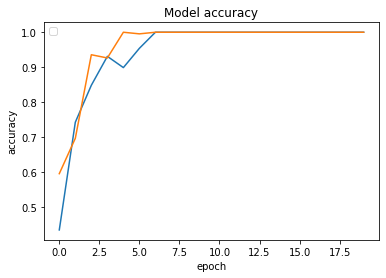

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()


In [27]:
from keras.models import load_model
Face = load_model('Face.h5')


This is:  Mai


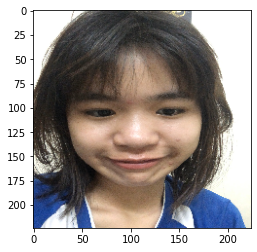

In [30]:
labels = {0: 'Han', 1: 'Trang', 2: 'Mai', 3: 'Nhu Quynh', 4: 'Thuyen Ha', 
          5:'Truc Anh', 6:'Van Minh'}
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/train/Thuyen_Ha/Ha (1).jpg',
               target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
val = Face.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

In [29]:
labels = {0: 'Han', 1: 'Trang', 2: 'Mai', 3: 'Nhu Quynh', 4: 'Thuyen Ha', 5:'Truc Anh', 6:'Van Minh'}
from keras.preprocessing.image import load_img, img_to_array
img = load_img('Q1.jpg', target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
val = Face.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

FileNotFoundError: ignored